1.	Consider the datasets of word pairs whose similarity is manually annotated, especially MC-28, Word-Sim, RG, available at https://github.com/alexanderpanchenko/sim-eval. Similarly to the work on this repository, we would like to test the usefulness of any new similarity measure by computing its correlation with human judgment (using Pearson coefficient). Review how Pearson Coefficient works and identify python script to achieve this. Study Datamuse API, which outputs a set of words that are available to a query word. This API is available at http://www.datamuse.com/api/. 

Datasets downloaded  
Pearson np.corrcoef()  
https://github.com/gmarmstrong/python-datamuse/ used for interfacing


In [1]:
import datamuse, csv

In [2]:
api = datamuse.Datamuse()
api.words(rel_rhy='orange', max=5)

[{'word': 'door hinge', 'score': 74, 'numSyllables': 2}]

In [21]:
test = api.words(ml='dank', max=10)

NameError: name 'api' is not defined

In [145]:
test[0]['word']

[test[i]['word'] for i in range(len(test))]

['clammy',
 'wet',
 'damp',
 'swamp',
 'dingy',
 'grimy',
 'fetid',
 'dankest',
 'dreary',
 'windowless']

2.	We would like to test the similarity between the pair (X,Y) by using the output of the Datamuse API for both X and Y. Set the number of outcome words in the API to be large, e.g., 100. Use Jaccard similarity to compute the similarity between X and Y (Counting the ratio of common words among the outputs of X and Y Datamuse API over the total number of distinct words in the two outputs).

In [3]:
def jaccard_sim(list1, list2):
    #intersect / union
    intersect = (set(list1).intersection(list2))
    union = (len(list1) + len(list2)) - len(intersect)
    return (len(intersect) / union)

In [51]:
wordlist1 = api.words(ml='dog', max=100)
wordlist2 = api.words(ml='hound', max=100)
words1 = [wordlist1[i]['word'] for i in range(len(wordlist1))]
words2 = [wordlist2[i]['word'] for i in range(len(wordlist2))]

print(words1)
print(words2)
jaccard_sim(words1, words2)

['canis familiaris', 'hound', 'tail', 'tag', 'heel', 'firedog', 'chase', 'trail', 'bounder', 'blackguard', 'track', 'frump', 'cad', 'pawl', 'click', 'go after', 'andiron', 'chase after', 'domestic dog', 'detent', 'puppy', 'pooch', 'pup', 'pet', 'canine', 'cats', 'terrier', 'pets', 'poodle', 'doggie', 'animal', 'mutt', 'doggy', 'bloodhound', 'rooster', 'goat', 'horse', 'monkey', 'pig', 'handler', 'stray', 'cow', 'hotdog', 'duck', 'boy', 'lapdog', 'beast', 'biscuit', 'jackal', 'girl', 'whelp', 'sled', 'ape', 'sausage', 'man', 'fluffy', 'doll', 'dogg', 'gun', 'guy', 'rascal', 'turd', 'buddy', 'refrigerator', 'fridge', 'toilet', 'neighborhood', 'pal', 'dude', 'bum', 'devil', 'bro', 'piggy', 'sleigh', 'cane', 'pack', 'wild', 'hell', 'scoundrel', 'mate', 'stupid', 'silly', 'chum', 'dumb', 'rabble', 'barney', 'bud', 'chien', 'stinker', 'death', 'evelyn', 'doug', 'god', 'blood', 'oscar', 'boring', 'christ', 'kau', 'hammer', 'watchdog']
['hound dog', 'dog', 'hunt', 'bounder', 'blackguard', 'cad

0.08695652173913043

NOW GET SOME NICE FORMULAS FOR JACCARD AND PEARSON FOR LATEX

3.	Repeat this process of calculating the similarity between each pair in MC-28 dataset, and then calculate the correlation coefficient with the human judgment using Pearson coefficient. Try to optimize the parameters of Datamuse API call by testing distinct number of outputs and monitor the value of the correlation until you reach the highest correlation value. Use this configuration to calculate the correlation value for other datasets, and compare the result with other state-of-art results as reported in relevant literature (e.g., previous sim-eval repository) .

SIM EVAL NORMALIZES SCORES TO 0,1 WITH MAX BEING 1 SO LET'S DO THAT AS WELL

In [4]:
mcreader = csv.reader(open('mc.csv'), delimiter = ';')
mcwords = []
for i in mcreader:
    mcwords.append(i)

In [6]:
print(mcwords)

[['automobile', 'car', '3.92'], ['gem', 'jewel', '3.84'], ['journey', 'voyage', '3.84'], ['boy', 'lad', '3.76'], ['coast', 'shore', '3.70'], ['asylum', 'madhouse', '3.61'], ['magician', 'wizard', '3.50'], ['midday', 'noon', '3.42'], ['furnace', 'stove', '3.11'], ['food', 'fruit', '3.08'], ['bird', 'cock', '3.05'], ['bird', 'crane', '2.97'], ['implement', 'tool', '2.95'], ['brother', 'monk', '2.82'], ['brother', 'lad', '1.66'], ['crane', 'implement', '1.68'], ['car', 'journey', '1.16'], ['monk', 'oracle', '1.10'], ['cemetery', 'woodland', '0.95'], ['food', 'rooster', '0.89'], ['coast', 'hill', '0.87'], ['forest', 'graveyard', '0.84'], ['shore', 'woodland', '0.63'], ['monk', 'slave', '0.55'], ['coast', 'forest', '0.42'], ['lad', 'wizard', '0.42'], ['cord', 'smile', '0.13'], ['glass', 'magician', '0.11'], ['rooster', 'voyage', '0.08'], ['noon', 'string', '0.08']]


In [5]:
sims = []
for i in range(len(mcwords)):
    sims.append(round(float(mcwords[i][2]),3))

In [6]:
maxsim = 4
for i in range(len(sims)):
    sims[i] = ((sims[i])/(maxsim))
print(sims)

[0.98, 0.96, 0.96, 0.94, 0.925, 0.9025, 0.875, 0.855, 0.7775, 0.77, 0.7625, 0.7425, 0.7375, 0.705, 0.415, 0.42, 0.29, 0.275, 0.2375, 0.2225, 0.2175, 0.21, 0.1575, 0.1375, 0.105, 0.105, 0.0325, 0.0275, 0.02, 0.02]


In [8]:
for i in range(len(mcwords)):
    mcwords[i][2] = round(sims[i], 4)

In [9]:
print(mcwords)

[['automobile', 'car', 0.98], ['gem', 'jewel', 0.96], ['journey', 'voyage', 0.96], ['boy', 'lad', 0.94], ['coast', 'shore', 0.925], ['asylum', 'madhouse', 0.9025], ['magician', 'wizard', 0.875], ['midday', 'noon', 0.855], ['furnace', 'stove', 0.7775], ['food', 'fruit', 0.77], ['bird', 'cock', 0.7625], ['bird', 'crane', 0.7425], ['implement', 'tool', 0.7375], ['brother', 'monk', 0.705], ['brother', 'lad', 0.415], ['crane', 'implement', 0.42], ['car', 'journey', 0.29], ['monk', 'oracle', 0.275], ['cemetery', 'woodland', 0.2375], ['food', 'rooster', 0.2225], ['coast', 'hill', 0.2175], ['forest', 'graveyard', 0.21], ['shore', 'woodland', 0.1575], ['monk', 'slave', 0.1375], ['coast', 'forest', 0.105], ['lad', 'wizard', 0.105], ['cord', 'smile', 0.0325], ['glass', 'magician', 0.0275], ['rooster', 'voyage', 0.02], ['noon', 'string', 0.02]]


In [ ]:
#These words can be used as is. Wordnet lemmatizer should be used to get
#base form from sentences.

In [10]:
def wordcombosim(wordlist, maxlength=100):
    #Wordlist is a list of word combinations where wordlist[i][0] is the first word and wordlist[i][1] the second.
    mcsimilarities = []

    for i in range(len(wordlist)):
        word1 = api.words(ml=str(wordlist[i][0]), max=maxlength)
        word2 = api.words(ml=str(wordlist[i][1]), max=maxlength)
        words1 = [word1[j]['word'] for j in range(len(word1))]
        words2 = [word2[j]['word'] for j in range(len(word2))]
        mcsimilarities.append(jaccard_sim(words1, words2))
    return mcsimilarities

In [ ]:
#SAVES TASK3 DATA, CAN BE FOUND IN MCCOMBOJACCARDMATRIX.CSV, Records jaccard similarity of every pair in MC, with maxlength going from 100 to 1.
#MAKES A BUNCH OF CALLS, CAREFUL
combojacmatrix = []
for i in range(100,0,-1):
    combojacmatrix.append(wordcombosim(mcwords, i))
    print(combojacmatrix)

Jaccard matrix is a similarity matrix for decreasing max length of mcwords wordlist

In [64]:
#WRITES PREVIOUS TO CSV, ALREADY DONE
with open('mccombojaccardmatrixYEAH.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for i in combojacmatrix:
        writer.writerow(i)

In [13]:
#READ THE WRITTEN MATRIX
readcombojacmatrix = []
with open('mccombojaccardmatrix.csv') as f:
    reader = csv.reader(f)
    for i in reader:
        readcombojacmatrix.append(i)

In [14]:
#Make str values floats to return csv to values extracted from api
for i in range(len(readcombojacmatrix)):
    for j in range(len(readcombojacmatrix[i])):
        readcombojacmatrix[i][j] = float(readcombojacmatrix[i][j])
        
#combojacmatrix == readcombojacmatrix

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Make a nice array of 0-100 maxlength similarity means. Reversed to 0-100 for plotting purposes.
readcombojacmatrixmeans = []
for i in readcombojacmatrix:
    readcombojacmatrixmeans.append(np.mean(i))
readcombojacmatrixmeans.reverse()
print(readcombojacmatrixmeans)

[0.03333333333333333, 0.02222222222222222, 0.03666666666666667, 0.04063492063492064, 0.04761904761904761, 0.05383838383838384, 0.052939652939652936, 0.04958374958374958, 0.04782051282051283, 0.054057529444526346, 0.05720854423640801, 0.05301501836432513, 0.04804856673964226, 0.05060060283248689, 0.05667896820820359, 0.060882796250725194, 0.06583562097688905, 0.06523336816440264, 0.06494432373456453, 0.06997136695261892, 0.06789207961842074, 0.0720806464514066, 0.07369443782492185, 0.07448265980050663, 0.07671626158985369, 0.07488525830147091, 0.07328242401539432, 0.0719205717943093, 0.07364067867350059, 0.07310303152075413, 0.074001440604536, 0.07288076494706068, 0.07190559692662273, 0.0693160140610877, 0.06690716186210634, 0.06597647870190405, 0.06895975192949472, 0.06994088765718615, 0.06961001932519767, 0.06860373914126416, 0.06971692681346635, 0.07001917821823754, 0.0698678838056074, 0.07153507798310099, 0.07192385950303323, 0.07102119149634646, 0.07045005096258192, 0.0709029307623

In [17]:
#Index of max mean value of maxlength
print(max(range(len(readcombojacmatrixmeans)), key=readcombojacmatrixmeans.__getitem__))

24


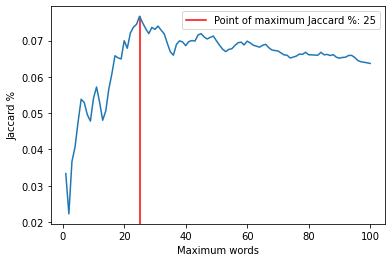

In [21]:
#Jaccard similarity as a function of maxwords.
x = np.linspace(1,100,100)
fig = plt.figure()
plt.ylabel('Jaccard %')
plt.xlabel('Maximum words')
plt.axvline(x=25, ymin=0, ymax=0.95, c='red', label='Point of maximum Jaccard %: 25')
plt.legend()
plt.plot(x, readcombojacmatrixmeans)
plt.show()

In [22]:
print(sims)

[0.98, 0.96, 0.96, 0.94, 0.925, 0.9025, 0.875, 0.855, 0.7775, 0.77, 0.7625, 0.7425, 0.7375, 0.705, 0.415, 0.42, 0.29, 0.275, 0.2375, 0.2225, 0.2175, 0.21, 0.1575, 0.1375, 0.105, 0.105, 0.0325, 0.0275, 0.02, 0.02]


In [23]:
#Pearson correlation as a function of maxwords
pearsonsims=[]
for i in readcombojacmatrix:
    pearsonsims.append(np.corrcoef(i,sims)[0][1])

In [24]:
print(max(range(len(pearsonsims)), key=pearsonsims.__getitem__))

75


In [25]:
print(max(pearsonsims))

0.7239651539404632


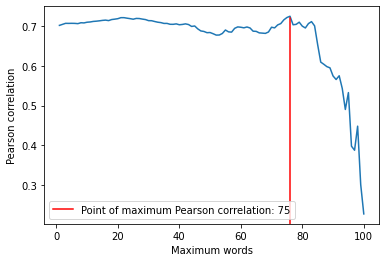

In [27]:
plt.ylabel('Pearson correlation')
plt.xlabel('Maximum words')
plt.plot(x, pearsonsims)
plt.axvline(x=76, ymin=0, ymax=0.945, c='red', label='Point of maximum Pearson correlation: 75')
plt.legend()
plt.show()

DO PEARSON STUFF

HIGHEST SIM SCORE WITH MAXLENGTH BEING 25.

4.	We would like to test the above strategy at sentence level as well. For this purpose, given sentence S1 and S2, which are tokenized for instance as S1=(w1, w2,..,wn) and S2= (p1, p2, …, pm). Then, the representation of S1, will consist of the overlap of the Datamuse output of each individual token w1, w2,…wm (It is important to set the number of outputted words per API call high in order to increase the chance of overlapping), add to this list the tokens of S1 as well. Repeat the same process for S2 and then compute the similarity between S1 and S2 as jaccard similarity of the representation of S1 and representation of S2. Write a simple python code that allows you to achieve this.

In [42]:
sentence1 = "Nice sentence for for the people folks good maybe?"
sentence2 = "Another sentence if you please"
#sentence1 = np.unique(sentence1.split())
#sentence2 = np.unique(sentence2.split())
print(sentence1)
print(sentence2)

Nice sentence for for the people folks good maybe?
Another sentence if you please


In [28]:
import nltk
from nltk.stem import WordNetLemmatizer
Stopwords = list(set(nltk.corpus.stopwords.words('english')))
print(Stopwords)

['wouldn', 'who', 'having', 'a', 'your', 'was', 'i', 'into', 'yourself', 'she', 'up', 'herself', "isn't", 'only', 'they', 'nor', 'been', "shan't", 'if', "didn't", 'didn', "don't", 'itself', 'these', 'not', 'below', 'll', 'does', 'her', 'needn', "weren't", 'before', "aren't", 'during', 'some', 'it', 'on', 'myself', 'y', "shouldn't", "you'll", 'yourselves', "wouldn't", 'too', 'as', 'hers', 'no', "should've", 'its', 'so', "you've", 'that', 'how', 'themselves', 'very', 'me', 'all', 'ain', 'ours', 'will', 'my', 'mightn', 'down', 'mustn', "hasn't", 'yours', 'should', 'own', "won't", 'there', 'when', 'doesn', 's', 'why', 'he', 'were', 'did', 'do', 'in', 'which', 'our', "mustn't", 'and', 'm', 'ourselves', 'their', 'doing', 'through', 'about', 'or', 'him', 'such', 'few', 'than', 'won', 'both', 'being', 'any', "hadn't", 'hasn', "you'd", 'be', "she's", 'after', "needn't", 'to', 'off', 'with', 'between', 'further', 'his', 're', 'more', 'again', "that'll", 'what', 'you', 'is', 'of', "it's", 'couldn

In [29]:
wn_lemmatizer = WordNetLemmatizer()
punctuations="?:!.,;"

In [49]:
#https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
sentence1_token = nltk.word_tokenize(sentence1)
sentence2_token = nltk.word_tokenize(sentence2)
for word in sentence1_token:
    if word in punctuations or word in Stopwords:
        sentence1_token.remove(word)
for word in sentence2_token:
    if word in punctuations or word in Stopwords:
        sentence2_token.remove(word)

In [31]:
#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

In [32]:
#https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
#CLEANUP ASSISTANCE
import unicodedata
import contractions
def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [33]:
get_wordnet_pos('nicely')

'r'

In [34]:
import re
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

In [35]:
def sentencecleaner(sentence):
    sentence_fix = remove_accented_chars(sentence)
    sentence_fix = contractions.fix(sentence_fix)
    sentence_fix = remove_special_characters(sentence_fix)
    sentence_fix = remove_numbers(sentence_fix)
    
    sentence_token = nltk.word_tokenize(sentence_fix.lower())
    sentence_lemma = []
    removewords = []
    for word in sentence_token:
        if word in punctuations or word in Stopwords:
            removewords.append(word)
    for i in removewords:
        sentence_token.remove(i)
    for i in sentence_token:
        sentence_lemma.append(wn_lemmatizer.lemmatize(i,get_wordnet_pos(i)))
    return list(set(sentence_lemma))

In [50]:
sentence1 = list(set(sentence1_token))
sentence2 = list(set(sentence2_token))

In [47]:
print(sentence1)
print(sentence2)

Nice sentence for for the people folks good maybe?
Another sentence if you please


In [38]:
def sentencerepwithoverlap(sentence, maxlength):
    rep = []
    represult = []
    for i in range(len(sentence)):
        word = api.words(ml=str(sentence[i]), max=maxlength)
        words = [word[j]['word'] for j in range(len(word))]
        rep.append(words)
    for i in rep:
        represult.append(sentencecleaner(' '.join(str(x) for x in i)))
    print(rep)
    print(represult)
    return represult

In [ ]:
replist1 = sentencerepwithoverlap(sentence1, 75)
replist2 = sentencerepwithoverlap(sentence2, 75)

In [46]:
print(len(replist1))
print(len(replist2))

50
30


In [39]:
#Get intersecting words from sentence words pairwise.
def pairwiseintersect(replist):
    intersects = []
    print(len(replist))
    for i in range(len(replist)):
        if i != len(replist):
            for j in range(i+1, len(replist)):
                intersects.append(set(replist[i]).intersection(replist[j]))
    return np.unique(intersects)

In [44]:
intersect1 = pairwiseintersect(replist1)
intersect2 = pairwiseintersect(replist2)

NameError: name 'replist1' is not defined

In [43]:
print(intersect1)

NameError: name 'intersect1' is not defined

In [130]:
#Clean messy sets and add the overlapping words to original sentence representation
if intersect1[0] == set():
    intersect1 = intersect1[1:]
for i in intersect1:
    for j in i:
        sentence1 = np.append(sentence1, j)
if intersect2[0] == set():
    intersect2 = intersect2[1:]
for i in intersect2:
    for j in i:
        sentence2 = np.append(sentence2, j)

In [131]:
print(sentence1)
print(sentence2)
jaccard_sim(sentence1, sentence2)

['sentence' 'Nice' 'maybe' 'for' 'good' 'people' 'folks' 'smart' 'yeah'
 'okay' 'alright' 'just' 'well' 'just' 'fine' 'statements' 'friends'
 'just' 'kind' 'pleasing' 'great' 'nifty' 'neat' 'cool' 'gracious'
 'respectable' 'superb' 'skillful' 'individuals' 'everyone' 'everybody'
 'guys' 'men' 'families' 'persons']
['sentence' 'you' 'Another' 'if' 'please' 'alia' 'sorry' 'pity' 'else'
 'that' 'even' 'like' 'yes' 'may']


0.020833333333333332

In [136]:
print(list(sentence1))
print(type(sentence1))

['sentence', 'Nice', 'maybe', 'for', 'good', 'people', 'folks', 'smart', 'yeah', 'okay', 'alright', 'just', 'well', 'just', 'fine', 'statements', 'friends', 'just', 'kind', 'pleasing', 'great', 'nifty', 'neat', 'cool', 'gracious', 'respectable', 'superb', 'skillful', 'individuals', 'everyone', 'everybody', 'guys', 'men', 'families', 'persons']
<class 'numpy.ndarray'>


In [51]:
print(readcombojacmatrix[1])
print(readcombojacmatrix[24])
#Highest Pearson correlation coefficient of human evaluated MC and jaccard sim-based evaluation (Task 3)
print(np.corrcoef(readcombojacmatrix[75],sims))
#Jaccard of sentence 1,2 with task 4 parameters added.
jaccard_sim(sentence1,sentence2)

[0.125, 0.31125827814569534, 0.2222222222222222, 0.17159763313609466, 0.2, 0.03125, 0.17159763313609466, 0.22981366459627328, 0.2147239263803681, 0.01020408163265306, 0.01020408163265306, 0.005076142131979695, 0.005076142131979695, 0.020618556701030927, 0.1, 0.0, 0.015384615384615385, 0.03664921465968586, 0.015384615384615385, 0.0, 0.01020408163265306, 0.0, 0.0, 0.005076142131979695, 0.0, 0.005076142131979695, 0.0, 0.0, 0.0, 0.0]
[0.16030534351145037, 0.26666666666666666, 0.2459016393442623, 0.1875, 0.216, 0.034013605442176874, 0.14285714285714285, 0.256198347107438, 0.22580645161290322, 0.006622516556291391, 0.013333333333333334, 0.0, 0.006622516556291391, 0.02702702702702703, 0.10948905109489052, 0.0, 0.020134228187919462, 0.02702702702702703, 0.006622516556291391, 0.0, 0.013333333333333334, 0.0, 0.0, 0.0, 0.0, 0.006622516556291391, 0.0, 0.0, 0.0, 0.0]
[[1.         0.72396515]
 [0.72396515 1.        ]]


0.1

5.	We want to test this strategy on publicly available sentence database. For this purpose, use STSS-131 dataset, available in “A new benchmark dataset with production methodology for short text semantic similarity algorithms” by O’Shea, Bandar and Crockett (ACM Trans. on Speech and Language Processing, 10, 2013). Use Pearson correlation coefficient to test the correlation with the provided human judgment. 

STSS FOUND IN FILE STSS-131
QNumber;Sentence1;Sentence2;Human Eval of semantic similarity(0-4);Stdev of Similarity(noisiness)

In [52]:
#READ SENTENCES FROM STSS-131
stsslist = [[],[],[]]
with open('STSS-131.csv') as f:
    reader = csv.reader(f,delimiter = ';')
    for i in reader:
        stsslist[0].append(i[1])
        stsslist[1].append(i[2])
        stsslist[2].append(float(i[3])/4) #4 being maximum

In [59]:
print(jaccard_sim(stsslist[0][0],stsslist[1][0]))

0.2


In [58]:
print(stsslist[0][0])

['like', 'would', 'tonight', 'drink', 'go']


In [55]:
#Clean STSSLIST PLEASE
for i in range(2):
    for j in range(len(stsslist[i])):
        stsslist[i][j] = sentencecleaner(stsslist[i][j])

In [56]:
print(stsslist[0])

[['like', 'would', 'tonight', 'drink', 'go'], ['vital', 'seriously', 'advise', 'matter', 'treat'], ['friend', 'delay', 'meet', 'train', 'station', 'go'], ['help', 'distract', 'relax', 'much', 'music'], ['punish', 'play', 'must', 'realise', 'alarm', 'definitely'], ['make', 'laugh', 'side', 'ache', 'much'], ['really', 'feel', 'cover'], ['want', 'behind', 'u', 'pub', 'hill', 'come'], ['work', 'seem', 'give', 'key', 'could', 'another'], ['frighten', 'ghost', 'appear', 'old', 'nowhere', 'man'], ['friend', 'present', 'need', 'prepared', 'good'], ['help', 'cross', 'lady', 'child', 'safely', 'thanks', 'road', 'lollipop'], ['invite', 'variety', 'party', 'interest', 'people'], ['condolence', 'parent', 'offer', 'murder', 'unfortunately', 'smith', 'john'], ['size', 'shape', 'thing', 'boat', 'come'], ['look', 'continuously', 'product', 'young', 'use', 'guarantee'], ['day', 'child', 'ran', 'farther'], ['lemon', 'slice', 'coke', 'always', 'especially', 'drink', 'like'], ['eczema', 'doctor', 'get', 's

In [60]:
sentencerep = (sentencerepwithoverlap(stsslist[0][0],75))
print(len(sentencerep))
#print(len(stsslist[0][0]))
#print(sentencerep)

NameError: name 'sentencerep' is not defined

In [282]:
print((sentencereplist[0][0]))

[{'get'} {'way'} {'go', 'way'} {'go', 'game'} {'want'} {'even'}
 {'think', 'bet', 'want', 'come', 'even', 'thing', 'wish', 'way', 'mind'}
 {'go', 'even'}]


In [61]:
sentencereplist = [[],[]]
for i in range(len(stsslist[0])):
    sentencerep1 = sentencerepwithoverlap(stsslist[0][i],75)
    sentencerep2 = sentencerepwithoverlap(stsslist[1][i],75)
    intersect1 = pairwiseintersect(sentencerep1)
    intersect2 = pairwiseintersect(sentencerep2)
    if intersect1[0] == set():
        intersect1 = intersect1[1:]
    if intersect2[0] == set():
        intersect2 = intersect2[1:]
    sentencereplist[0].append(intersect1)
    sentencereplist[1].append(intersect2)
    print(intersect1)
    print(intersect2)

[['ish', 'similar', 'wish', 'same', 'alike', 'comparable', 'suchlike', 'care', 'equivalent', 'equal', 'corresponding', 'ly', 'like-minded', 'y', 'really', 'kind', 'think', 'sort', 'kinda', 'just', 'know', 'unlike', 'resemble', 'even', 'such', 'prefer', 'akin', 'kinds', 'ala', 'seem', 'wanna', 'pretend', 'hate', 'adore', 'type', 'fancy', 'feel', 'thing', 'way', 'love', 'analogous', 'fond', 'come', 'loves', 'whatever', 'loved', 'happy', 'ask', 'envy', 'tell', 'because', 'enjoy', 'types', 'dislike', 'admire', 'etc', 'say', 'alongside', 'true', 'appreciate', 'cares', 'favorite', 'including', 'please', 'asif', 'believe', 'bet', 'urge', 'example', 'welcome', 'fancies', 'style', 'hope', 'mind', 'rad'], ['ought', 'dare', 'expected', 'wish', 'gonna', 'never', 'oughta', 'only', 'wanna', 'council', 'club', 'association', 'woulding', 'able', 'bes', 'likely', 'unlikely', 'but', 'inclined', 'nould', 'this', 'in all likelihood', 'have in mind', 'somewise', 'and then', 'think', 'you bet', 'could', 'in

In [72]:
test = [[],[]]
for i in range(len(sentencereplist[0])):
        test[0].append([list(j) for j in (sentencereplist[0][i])])
for i in range(len(sentencereplist[1])):
        test[1].append([list(j) for j in (sentencereplist[1][i])])

In [73]:

finalsentencerep1 = [[] * 1 for i in range(len(test[0]))]
finalsentencerep2 = [[] * 1 for i in range(len(test[0]))]
for i in range(len(test[0])):
    for j in range(len(test[0][i])):
        for k in test[0][i][j]:
            finalsentencerep1[i].append(k)
for i in range(len(test[1])):
    for j in range(len(test[1][i])):
        for k in test[1][i][j]:
            finalsentencerep2[i].append(k)

In [74]:
print(stsslist[0][52])
print(list(set(finalsentencerep1[52])))

['cat', 'find', 'back', 'lunch', 'hungry', 'garden', 'go']
['recover', 'food', 'try', 'get', 'plump', 'back', 'appetite', 'game', 'dinner', 'eat', 'hold', 'regain', 'away', 'munchies', 'pizza', 'break', 'come']


In [294]:
with open('sentencerepNEW.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=' ')
    for i in finalsentencerep1:
        writer.writerow(i)

In [295]:
with open('sentencerepNEW2.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=' ')
    for i in finalsentencerep2:
        writer.writerow(i)

In [113]:
readsentencerep1 = []
with open('sentencerepNEW.csv') as f:
    reader = csv.reader(f,delimiter = ' ')
    for i in reader:
        readsentencerep1.append(i)

In [114]:
readsentencerep2 = []
with open('sentencerepNEW2.csv') as f:
    reader = csv.reader(f,delimiter = ' ')
    for i in reader:
        readsentencerep2.append(i)

In [115]:
print(readsentencerep1==finalsentencerep1)
print((readsentencerep2)==finalsentencerep2)

False
False


In [116]:
print(list(set(readsentencerep1[0])))
print(list(set(finalsentencerep1[0])))

['way', 'mind', 'want', 'get', 'bet', 'thing', 'wish', 'game', 'come', 'think', 'go', 'even']
['way', 'mind', 'want', 'wish', 'thing', 'bet', 'get', 'game', 'come', 'think', 'go', 'even']


In [117]:
print(len(stsslist[0]))
print(len(readsentencerep2))

66
66


In [118]:
#ADDS SENTENCE REPRESENTATIONS TO STSSLIST
for i in range(len(stsslist[0])):
    stsslist[0][i]+=readsentencerep1[i]
    stsslist[1][i]+=readsentencerep2[i]

In [119]:
for i in range(len(stsslist[0])):
    stsslist[0][i]=(list(set(stsslist[0][i])))
for i in range(len(stsslist[1])):
    stsslist[1][i]=(list(set(stsslist[1][i])))

In [120]:
print(stsslist[0][0])

['go', 'way', 'want', 'get', 'bet', 'thing', 'wish', 'game', 'think', 'would', 'tonight', 'even', 'drink', 'mind', 'like', 'come']


In [121]:
#STORES JACCARD SIMS OF COMPLETE SENTENCE REPRESENTATIONS IN STSS
stssrepjaccard = []
for i in range(len(stsslist[0])):
    stssrepjaccard.append(jaccard_sim(stsslist[0][i],stsslist[1][i]))

In [122]:
print(stssrepjaccard)
print(stsslist[0][1],stsslist[1][1])
print(np.corrcoef(stssrepjaccard,stsslist[2]))

[0.18, 0.1, 0.030303030303030304, 0.0, 0.13043478260869565, 0.15384615384615385, 0.13793103448275862, 0.19444444444444445, 0.0821917808219178, 0.029411764705882353, 0.24, 0.047619047619047616, 0.11764705882352941, 0.2, 0.0, 0.10526315789473684, 0.42857142857142855, 0.375, 0.023255813953488372, 0.1, 0.017857142857142856, 0.1, 0.07692307692307693, 0.10256410256410256, 0.10344827586206896, 0.0, 0.043478260869565216, 0.14583333333333334, 0.06382978723404255, 0.09090909090909091, 0.14285714285714285, 0.1896551724137931, 0.045454545454545456, 0.6129032258064516, 0.041666666666666664, 0.07692307692307693, 0.15217391304347827, 0.8823529411764706, 0.0, 0.0, 0.09523809523809523, 0.09090909090909091, 0.0625, 0.13513513513513514, 0.24390243902439024, 0.0, 0.10810810810810811, 0.3125, 0.16, 0.05555555555555555, 0.13157894736842105, 0.03333333333333333, 0.08333333333333333, 0.13333333333333333, 0.2916666666666667, 0.1320754716981132, 0.04, 0.15625, 0.13636363636363635, 0.025, 0.0, 0.0847457627118644

6.	Repeat the process of sentence similarity of STSS-131 but using word2vec embedding as in the labs assuming the vector representation of a sentence is the average of the word embedding vectors of all tokens in the sentence. Calculate the corresponding Pearson correlation as well. 

In [123]:
import gensim.models

In [124]:
#https://www.kaggle.com/varun08/sentiment-analysis-using-word2vec

num_features = 300

print("Training model....")
model = gensim.models.Word2Vec(sentences=(stsslist[0]+stsslist[1]),vector_size=num_features,min_count=2,window=5)


# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "300fea_7min_10con_stss1"
model.save(model_name)

Training model....


In [125]:
model = gensim.models.Word2Vec.load('300fea_7min_10con_stss1')

In [126]:
len(model.wv.index_to_key)

496

In [127]:
model.wv.most_similar("man")

[('somebody', 0.1726616472005844),
 ('size', 0.1604112833738327),
 ('let', 0.14957207441329956),
 ('suffer', 0.1482534557580948),
 ('provide', 0.14823415875434875),
 ('see', 0.14791707694530487),
 ('john', 0.1414005607366562),
 ('draw', 0.14138667285442352),
 ('performance', 0.1392292082309723),
 ('probably', 0.13859941065311432)]

In [128]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index_to_key_set = set(model.wv.index_to_key)
    
    for word in  words:
        if word in index_to_key_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model.wv[word])
    
    # Dividing the result by number of words to get average
    if nwords==0:
        return featureVec
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [129]:
vec1 = featureVecMethod(stsslist[0][0], model, num_features)
vec2 = featureVecMethod(stsslist[1][0], model, num_features)
#print(np.corrcoef(vec1,vec2))

In [130]:
print(stsslist[1][65])

['still', 'enough', 'diet', 'suck', 'dessert', 'could', 'feast', 'starve', 'din', 'something', 'appetite', 'dinner', 'eat', 'remain', 'deplete', 'either', 'another', 'however', 'cooking', 'anyway', 'though', 'consume', 'gobble', 'snack', 'might', 'feed', 'hungry', 'buffet', 'even', 'food', 'ravage', 'want', 'dine', 'chow', 'lunch', 'yet', 'meal', 'supper', 'grub', 'devour', 'breakfast']


In [131]:
from scipy import spatial

In [138]:
word2vecsims = []
for i in range(len(stsslist[0])):
    vec1 = featureVecMethod(stsslist[0][i], model, num_features)
    vec2 = featureVecMethod(stsslist[1][i], model, num_features)
    simm = 1-spatial.distance.cosine(vec1, vec2)
    word2vecsims.append(simm)

In [146]:
#INDICES WHICH RETURN NO HITS WITH FEATUREVEC ARE INITIALIZED TO SIMILARITY MEAN

0.9743252396583557


In [144]:
print(word2vecsims[14])
print(np.corrcoef(word2vecsims,stsslist[2]))

0.4038
[[1.         0.63798097]
 [0.63798097 1.        ]]


In [ ]:
vec1 = featureVecMethod(stsslist[0][14], model, num_features)
vec2 = featureVecMethod(stsslist[1][14], model, num_features)
print(vec1,vec2)
print(1-spatial.distance.cosine(vec1, vec2))

In [134]:
print(stsslist[0][14])
print(stsslist[1][14])


['sort', 'amount', 'silhouette', 'make', 'thing', 'craft', 'boat', 'total', 'composition', 'shape', 'number', 'fit', 'like', 'size', 'way', 'want', 'do', 'issue', 'situation', 'good', 'dimension', 'come']
['depend', 'electric', 'comfy', 'chair']


In [137]:
#Cosine similarity for the summed vectors
sim = 1 - spatial.distance.cosine(vec1, vec2)
print(sim)

0.683785617351532


7.	Repeat 6) when using Glove and FastText embedding. Comment on the overall performance of Datamuse API based approach for text similarity. 

In [194]:
#USE PRETRAINED MODEL BASED ON WIKIPEDIA,
#BIN LOAD_MODEL
model = gensim.models.fasttext.load_facebook_vectors(("wiki.en.bin"))

In [148]:
#CUSTOM MODEL
model = gensim.models.FastText(vector_size=6, window=3, min_count=1)
model.build_vocab(corpus_file=corpus_file)
model.train(corpus_file=corpus_file, total_examples=model.corpus_count, epochs =10,total_words=model.corpus_total_words)

(482158, 603870)

In [206]:
print(model)
print(model.most_similar('morning'))
print(model.similarity('morning', 'afternoon'))

[('afternoon', 0.8490473628044128), ('evening', 0.822727382183075), ('afternoon,', 0.7867569923400879), ('morning/afternoon', 0.7712761163711548), ('midday', 0.7701640725135803), ('mornings', 0.7619776725769043), ('#afternoon', 0.7371513843536377), ('midmorning', 0.7367087006568909), ('fternoon', 0.7244671583175659), ('morning…', 0.7226278185844421)]
0.8490473


In [221]:
print((' '.join(x for x in (stsslist[0][0]))))
print(model.getSentenceVector(' '.join(x for x in (stsslist[0][0]))))

go way want get bet thing wish game think would tonight even drink mind like come


AttributeError: 'FastTextKeyedVectors' object has no attribute 'getSentenceVector'

In [247]:
stsslist[0][0]

['go',
 'way',
 'want',
 'get',
 'bet',
 'thing',
 'wish',
 'game',
 'think',
 'would',
 'tonight',
 'even',
 'drink',
 'mind',
 'like',
 'come']

In [261]:
#print(model[(' '.join(x for x in (stsslist[0][0])))])
#print(model[stsslist[0][0][0]])
#GETTING SENTENCE REPRESENTATION VECTOR BY CALCULATING MEAN OF WORD VECTORS
fastvecmeans1 = []
for i in range(len(stsslist[0])):
    jarray = []
    for j in range(len(stsslist[0][i])):
        jarray.append((model[stsslist[0][i][j]]))
    fastvecmeans1.append(np.mean(jarray, axis=0))
fastvecmeans2 = []
for i in range(len(stsslist[1])):
    jarray = []
    for j in range(len(stsslist[1][i])):
        jarray.append((model[stsslist[1][i][j]]))
    fastvecmeans2.append(np.mean(jarray, axis=0))
#print(np.mean(model[stsslist[0][0]], axis=0))

In [268]:
stsslist[0][1]

['vital',
 'seriously',
 'important',
 'critical',
 'advise',
 'need',
 'matter',
 'process',
 'treat',
 'relevant',
 'give',
 'know',
 'regard',
 'serious']

In [267]:
#Calculating pairwise vector similarities
model.most_similar(fastvecmeans1[1])

[('importantly', 0.7702617645263672),
 ('important—but', 0.7360436916351318),
 ('understand', 0.7283353209495544),
 ('pertinent', 0.7216832041740417),
 ('relevant', 0.7060494422912598),
 ('really', 0.705588161945343),
 ('concerned', 0.7015405297279358),
 ('importantly,', 0.7004842758178711),
 ('regard', 0.6991565227508545),
 ('matter', 0.6981676816940308)]

In [274]:
fasttextsimilarities = []
for i in range(len(fastvecmeans1)):
    fasttextsimilarities.append(1-spatial.distance.cosine(fastvecmeans1[i], fastvecmeans2[i]))

In [280]:
print(fasttextsimilarities)
print(np.corrcoef(fasttextsimilarities,stsslist[2]))

[0.9309466481208801, 0.8313552737236023, 0.7950983047485352, 0.5224679112434387, 0.7924671769142151, 0.7706679105758667, 0.8840659856796265, 0.9131872057914734, 0.8679664134979248, 0.7320940494537354, 0.8546603918075562, 0.7655147910118103, 0.8526213765144348, 0.8396715521812439, 0.56303870677948, 0.8319114446640015, 0.8355627059936523, 0.959233283996582, 0.6348072290420532, 0.6578631401062012, 0.7174856066703796, 0.8377529978752136, 0.8727715611457825, 0.7183147668838501, 0.8108795285224915, 0.7195296883583069, 0.5951146483421326, 0.858301043510437, 0.7885351777076721, 0.7127411365509033, 0.9012643694877625, 0.9003151655197144, 0.698777973651886, 0.9737748503684998, 0.6538423895835876, 0.6590323448181152, 0.8788955211639404, 0.9893984198570251, 0.5042496919631958, 0.5982573628425598, 0.7436182498931885, 0.8332915902137756, 0.7816933393478394, 0.8658283352851868, 0.915907621383667, 0.6606690287590027, 0.858157217502594, 0.9262897372245789, 0.858809769153595, 0.757637619972229, 0.795652

In [278]:
np.savetxt("fasttextsimilarities.csv", fasttextsimilarities, delimiter=",")

In [256]:
#Manual check for first index mean
meanstest = []
meanzero = []
for i in range(len(stsslist[0][0])):
    meanstest.append(model[stsslist[0][0][i]])
    meanzero.append((model[stsslist[0][0][i]])[0])
#print(meanzero)
#print(meanstest) ACCURATE, 0 INDEX CORRECT
#print(np.mean(meanstest,axis=0))
#print(np.mean(meanzero)) CORRECT MEAN

[-6.18097000e-02  2.01393738e-02 -4.44610789e-02  3.18292975e-02
 -1.74510539e-01  6.36117309e-02 -6.35298342e-02 -2.00903714e-01
 -3.58154327e-02  1.51844412e-01  1.37436643e-01 -5.18489927e-02
 -4.09652181e-02 -1.61055177e-01  1.12315655e-01 -8.71522203e-02
 -9.87245888e-02  7.54469410e-02 -2.81985477e-03  4.43556346e-02
 -3.32219228e-02  6.59166053e-02 -2.99317706e-02 -1.50911868e-01
 -4.34762575e-02 -1.05088636e-01 -1.24298846e-02 -5.15228733e-02
 -5.05457632e-02  9.36277211e-02 -8.51447508e-02  1.15795135e-01
 -1.64612010e-01  5.16755357e-02 -1.13801064e-03 -7.21744746e-02
  1.24604041e-02 -6.97386414e-02 -4.31441888e-02 -1.44350752e-01
  3.99634279e-02 -4.16253731e-02 -8.48922506e-02 -6.92178160e-02
  6.87885331e-03  1.99846342e-01  1.26105219e-01 -4.15127613e-02
 -1.43952385e-01 -1.07054919e-01  2.27680691e-02 -2.18617171e-01
  1.08972371e-01 -1.23901799e-01 -4.94406484e-02  2.57883579e-01
 -6.56895936e-02  2.89286450e-02 -4.20274027e-02  1.61946639e-01
 -2.49856599e-02 -5.01531

In [253]:
print((fastvecmeans[0]))

[-6.18097000e-02  2.01393738e-02 -4.44610789e-02  3.18292975e-02
 -1.74510539e-01  6.36117309e-02 -6.35298342e-02 -2.00903714e-01
 -3.58154327e-02  1.51844412e-01  1.37436643e-01 -5.18489927e-02
 -4.09652181e-02 -1.61055177e-01  1.12315655e-01 -8.71522203e-02
 -9.87245888e-02  7.54469410e-02 -2.81985477e-03  4.43556346e-02
 -3.32219228e-02  6.59166053e-02 -2.99317706e-02 -1.50911868e-01
 -4.34762575e-02 -1.05088636e-01 -1.24298846e-02 -5.15228733e-02
 -5.05457632e-02  9.36277211e-02 -8.51447508e-02  1.15795135e-01
 -1.64612010e-01  5.16755357e-02 -1.13801064e-03 -7.21744746e-02
  1.24604041e-02 -6.97386414e-02 -4.31441888e-02 -1.44350752e-01
  3.99634279e-02 -4.16253731e-02 -8.48922506e-02 -6.92178160e-02
  6.87885331e-03  1.99846342e-01  1.26105219e-01 -4.15127613e-02
 -1.43952385e-01 -1.07054919e-01  2.27680691e-02 -2.18617171e-01
  1.08972371e-01 -1.23901799e-01 -4.94406484e-02  2.57883579e-01
 -6.56895936e-02  2.89286450e-02 -4.20274027e-02  1.61946639e-01
 -2.49856599e-02 -5.01531

In [209]:
#Collate word vectors for all sentences
fastsentencevecs = []
for i in range(len(stsslist[0])):
    
    for j in range(len(stsslist[0][i])):
        print(model[stsslist[0][i][j]])

[ 7.69403875e-02  2.97997594e-02  1.74053274e-02  2.31896341e-03
 -2.22940028e-01 -1.16402403e-01 -9.26904753e-02 -1.42687410e-01
 -2.94816256e-01  1.65784359e-01 -9.33676958e-04 -1.44168124e-01
 -6.53048903e-02 -3.94442230e-01  8.56541693e-02 -1.45473540e-01
 -1.00550324e-01  1.46317109e-01 -1.19231671e-01 -9.89265889e-02
 -1.36114687e-01  2.06308931e-01 -1.89497098e-01  8.31419230e-03
  1.04481310e-01  8.79591703e-02 -1.03053883e-01 -1.23869285e-01
 -2.28745431e-01  1.80716783e-01 -1.33234233e-01  2.68073022e-01
 -4.87926900e-02 -1.59338966e-01 -2.14769870e-01 -3.33836257e-01
  5.14326543e-02 -1.03962868e-02 -6.23987839e-02 -3.37437242e-01
  1.30042195e-01 -1.85234591e-01  9.46165696e-02 -1.91315293e-01
 -2.96692476e-02  3.77454400e-01  2.13501453e-01  4.28509042e-02
 -1.46065563e-01 -7.68949166e-02  1.53720781e-01 -4.16293472e-01
 -8.58134553e-02  2.51035392e-03  1.01101995e-01  2.59998292e-01
 -2.52258778e-02  9.16387141e-02 -1.49359167e-01 -2.14173943e-02
 -4.03126292e-02 -5.81905

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [ ]:
stssfastsim = []
for i in range(len(stsslist[0])):
    stssfastsim.append(model.similarity

In [279]:
print(stssfastsim)

NameError: name 'stssfastsim' is not defined

In [149]:
#print(model.wv[stsslist[0][3]])
print(stsslist[0][0])
print(model.wv[stsslist[0][0]])
vec1 = np.mean(model.wv[stsslist[0][0]], axis=0)
vec2 = np.mean(model.wv[stsslist[1][0]], axis=0)
print(vec1)
print(vec2)
print(np.corrcoef(vec1,vec2))


['go', 'way', 'want', 'get', 'bet', 'thing', 'wish', 'game', 'think', 'would', 'tonight', 'even', 'drink', 'mind', 'like', 'come']
[[-1.3561912  -0.322332    0.90112287 -1.7385832  -0.8718553   1.7588995 ]
 [-2.0744073  -0.44039154  1.4089129  -2.8856304  -1.2636759   2.6800752 ]
 [-2.4294024  -0.59496784  1.7402358  -3.2867951  -1.5073707   3.113331  ]
 [-1.8276514  -0.39213037  1.1842767  -2.3320236  -1.1240209   2.3153362 ]
 [-2.7011034  -0.44427893  1.8453392  -3.2232435  -1.6896763   3.2603567 ]
 [-3.8453555  -0.53069854  2.5997202  -4.992245   -2.5724058   5.0313754 ]
 [-1.3486164  -0.30694154  0.9260822  -1.7291667  -0.6828116   1.6534946 ]
 [-1.0772126  -0.18658285  0.738743   -1.4545544  -0.5522896   1.3672528 ]
 [-1.9028157  -0.5745327   1.4724758  -2.266708   -1.6043245   2.3673666 ]
 [-2.74093    -0.836093    2.206573   -3.179756   -1.9065213   2.9017403 ]
 [-1.9052992  -0.38868377  1.2784599  -2.3827507  -0.9929825   2.3523715 ]
 [-2.4504182  -0.45833328  1.6627175  -3.100

In [200]:
print(model.similarity("morning", "morn"))

0.37847704


In [150]:
fastcorrs = []
for i in range(len(stsslist[0])):
    vec1 = np.mean(model.wv[stsslist[0][i]], axis=0)
    vec2 = np.mean(model.wv[stsslist[1][i]], axis=0)
    fastcorrs.append(np.corrcoef(vec1,vec2)[0][1])

In [162]:
model.wv.most_similar('eat')

[("can't", 0.9999921321868896),
 ('Goshen', 0.9999679923057556),
 ('unwrapped.', 0.9999615550041199),
 ('can[not]', 0.9999427199363708),
 ('program...,"', 0.9999423623085022),
 ('bat', 0.9999333024024963),
 ('closed.', 0.9999234676361084),
 ('warned.', 0.999913215637207),
 ('cherry-picked,"', 0.9999062418937683),
 ('notice.', 0.9999061822891235)]

In [ ]:
#NORMALIZE THE COEFFICIENTS BABY

8.	Study the programs in https://github.com/gsi-upm/sematch they attempt to provide other individual similarity but using other lexical database, not necessarily WordNet. Accommodate the provided files into your compare and repeat the calculus of Sim(S1,S2) for each pair of sentence where the individual similarity Sim(s,t) is calculated using YAGO concepts or DBPedia concepts freely available from the program. Compare the behavior of the result.

In [ ]:
for i in range(len(stsslist[0])):
    for j in range(len(stsslist[0][i])):
        print(stsslist[0][i][j])

In [55]:
from sematch.semantic.similarity import YagoTypeSimilarity
yago_sim = YagoTypeSimilarity()

In [125]:
meanyagosentencesim = []
for k in range(len(stsslist[0])):
    yagosentencesim = []
    for i in stsslist[0][k]:
        for j in stsslist[1][k]:
            w1 = yago_sim.word2yago(i)
            w2 = yago_sim.word2yago(j)
            if w1:
                w1=w1[0]
            if w2:
                w2=w2[0]
            if w1 and w2:
                yagosentencesim.append(yago_sim.yago_similarity(w1, w2, 'wpath'))
    meanyagosentencesim.append(np.mean(yagosentencesim))

In [126]:
for i in range(len(meanyagosentencesim)):
    if np.isnan(meanyagosentencesim[i]):
                meanyagosentencesim[i] = float(0)

In [127]:
print((meanyagosentencesim))
print((stsslist[2]))
print(np.corrcoef(meanyagosentencesim,stsslist[2]))

[0.1399446846809536, 0.12496756717269256, 0.12877433553021866, 0.10307844151915639, 0.17492618497006504, 0.15497459717872744, 0.14945186957181403, 0.09758969100018415, 0.10788161060337408, 0.13780174646927046, 0.15530118558903755, 0.12032213445731552, 0.14045839130163715, 0.18767572757358308, 0.0920515120193874, 0.13713895140778434, 0.0, 0.16824278627137346, 0.09844498156600463, 0.21437142995244723, 0.10111099050380665, 0.1411813430452022, 0.13240012444733812, 0.12837273860851717, 0.15257039232406694, 0.16262085167732984, 0.1307419650112004, 0.13127618378176756, 0.10861115762893708, 0.17457215556418484, 0.12206503451235484, 0.10614247544795478, 0.13412078110428344, 0.26793897430096625, 0.1446226790660987, 0.1124509841367496, 0.15860473370632877, 0.15877078987020454, 0.11838066681191048, 0.0, 0.12345734580475996, 0.16991434406187444, 0.1219367526123227, 0.18703513975057703, 0.14761031486202458, 0.1004858973107612, 0.1126927752140845, 0.1544301941460677, 0.1629806325606096, 0.10466648246

9.	Suggest GUI of your own that facilitate the demonstration of your finding above